In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
from scipy import stats
from scipy.stats import linregress
import numpy as np

In [2]:
file_path = Path("../New_Car_Loan_Analysis/Resources/car_df.csv")

temp_df = pd.read_csv(file_path)

temp_df.dropna()

,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00000,6758.666667,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00000,6058.000000,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00000,4815.000000,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33333,5883.000000,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.66667,5582.666667,135.028,742.02088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-04-01,1982667,141600.0000,12.41471,14.75663,38044.46,24997.55,4.98,14.08,97307.00000,14794.666670,170.626,1445.19726
57,2022-07-01,1996667,149000.0000,9.96116,7.04461,40155.68,25401.15,5.47,14.38,94596.33333,14288.000000,173.732,1476.90938
58,2022-10-01,2144333,141666.6667,7.14219,-3.35331,39407.02,24908.59,6.07,14.78,92916.33333,12121.666670,176.870,1499.48983
59,2023-01-01,2149000,147400.0000,5.91060,-12.12838,39066.36,23537.12,6.41,15.70,93448.00000,14638.000000,178.662,1516.36253


In [3]:
# Round 'Car Retail Sales (New)' and 'Car Retail Sales (Used)' columns to two decimal places
temp_df["Car Retail Sales (New)"] = temp_df["Car Retail Sales (New)"].round(2)
temp_df["Car Retail Sales (Used)"] = temp_df["Car Retail Sales (Used)"].round(2)
temp_df.head()

,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00,6758.67,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00,6058.00,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00,4815.00,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33,5883.00,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.67,5582.67,135.028,742.02088


In [4]:
new_car_df = temp_df[['observation_date', 'Number of Cars Made']].dropna().copy()

new_car_df = pd.DataFrame({
    "Dates": new_car_df["observation_date"],
    "Cars Made (Thousands)": new_car_df["Number of Cars Made"]
})

new_car_df.describe

<bound method NDFrame.describe of          Dates  Cars Made (Thousands)
0   2008-04-01            301000.0000
1   2008-07-01            342266.6667
2   2008-10-01            271766.6667
3   2009-01-01            132300.0000
4   2009-04-01            149900.0000
..         ...                    ...
56  2022-04-01            141600.0000
57  2022-07-01            149000.0000
58  2022-10-01            141666.6667
59  2023-01-01            147400.0000
60  2023-04-01            147166.6667

[61 rows x 2 columns]>

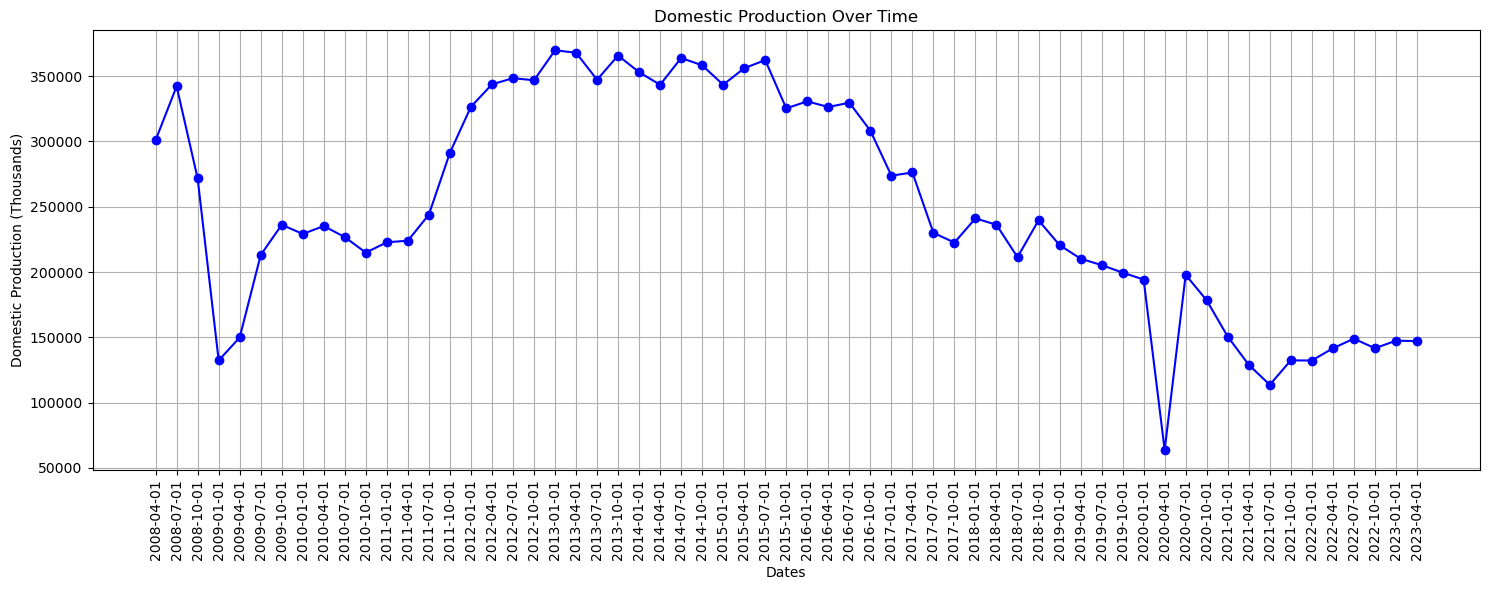

In [5]:
plt.figure(figsize=(15, 6))
plt.plot( new_car_df["Dates"], new_car_df['Cars Made (Thousands)'], marker='o', linestyle='-', color='blue')
plt.title('Domestic Production Over Time')
plt.xlabel('Dates')
plt.ylabel('Domestic Production (Thousands)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.savefig(os.path.join("Data Output", 'new_domestic_production_plot.png'))
plt.show()


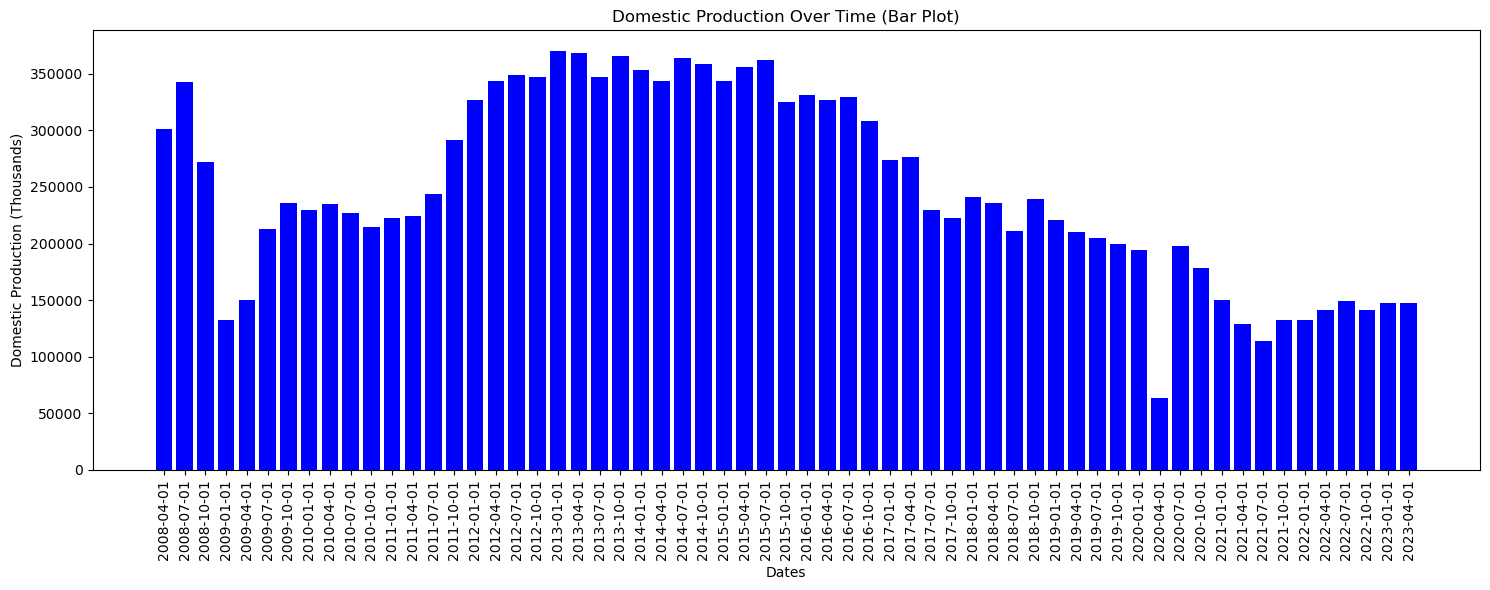

In [6]:
plt.figure(figsize=(15, 6))
plt.bar(new_car_df['Dates'], new_car_df["Cars Made (Thousands)"], color='blue')
plt.title('Domestic Production Over Time (Bar Plot)')
plt.xlabel('Dates')
plt.ylabel('Domestic Production (Thousands)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join("Data Output", 'new_domestic_production_bar_plot.png'))
plt.show()

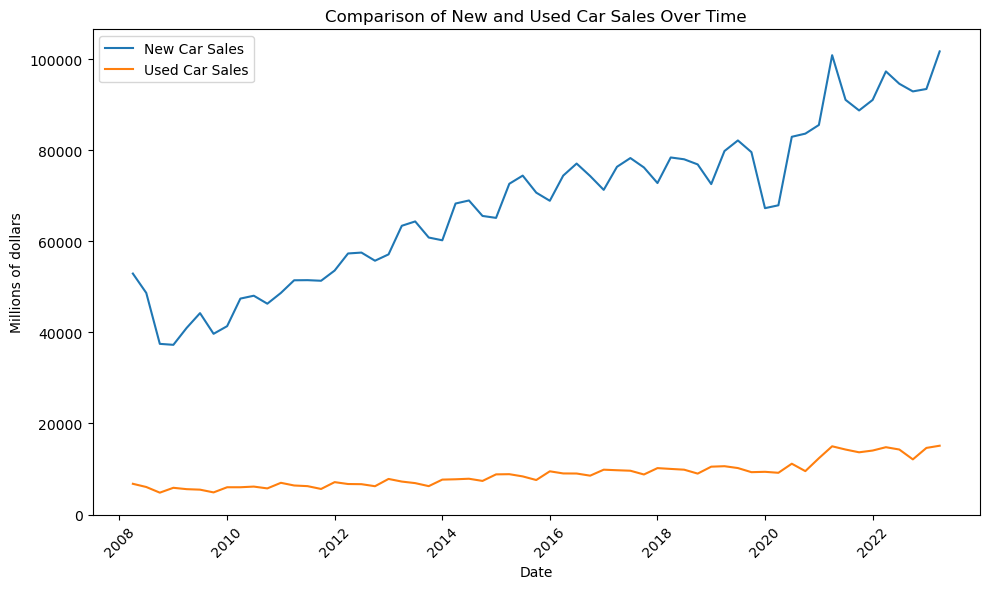

In [7]:
temp_df["observation_date"] = pd.to_datetime(temp_df["observation_date"])

# Plotting the line plot for used and new car sales over time
plt.figure(figsize=(10, 6)) 

plt.plot(temp_df["observation_date"], temp_df["Car Retail Sales (New)"], label="New Car Sales")
plt.plot(temp_df["observation_date"], temp_df["Car Retail Sales (Used)"], label="Used Car Sales")

plt.title("Comparison of New and Used Car Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Millions of dollars")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Filter the data for the first DataFrame (dates from 2008 to 2019)
df_precovid = temp_df[(temp_df["observation_date"].dt.year >= 2008) & (temp_df["observation_date"].dt.year <= 2019)]
df_precovid = df_precovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)", "Average Finance Rate (New)", "Average Finance Rate (Used)"]]
df_precovid.head()


,observation_date,Car Retail Sales (New),Car Retail Sales (Used),Average Finance Rate (New),Average Finance Rate (Used)
0,2008-04-01,52920.00,6758.67,5.74,10.63
1,2008-07-01,48668.00,6058.00,5.56,10.62
2,2008-10-01,37487.00,4815.00,5.62,10.33
3,2009-01-01,37274.33,5883.00,5.71,10.37
4,2009-04-01,40983.67,5582.67,4.71,10.06


In [9]:
# Filter the data for the second DataFrame (dates from 2020 onwards)
df_postcovid = temp_df[temp_df["observation_date"].dt.year >= 2020]
df_postcovid = df_postcovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)", "Average Finance Rate (New)", "Average Finance Rate (Used)"]]
df_postcovid.head()

,observation_date,Car Retail Sales (New),Car Retail Sales (Used),Average Finance Rate (New),Average Finance Rate (Used)
47,2020-01-01,67281.67,9392.33,6.13,14.31
48,2020-04-01,67910.67,9176.67,4.80,14.23
49,2020-07-01,82953.00,11170.00,4.98,12.69
50,2020-10-01,83644.33,9542.67,5.07,12.99
51,2021-01-01,85548.00,12376.00,4.79,13.58


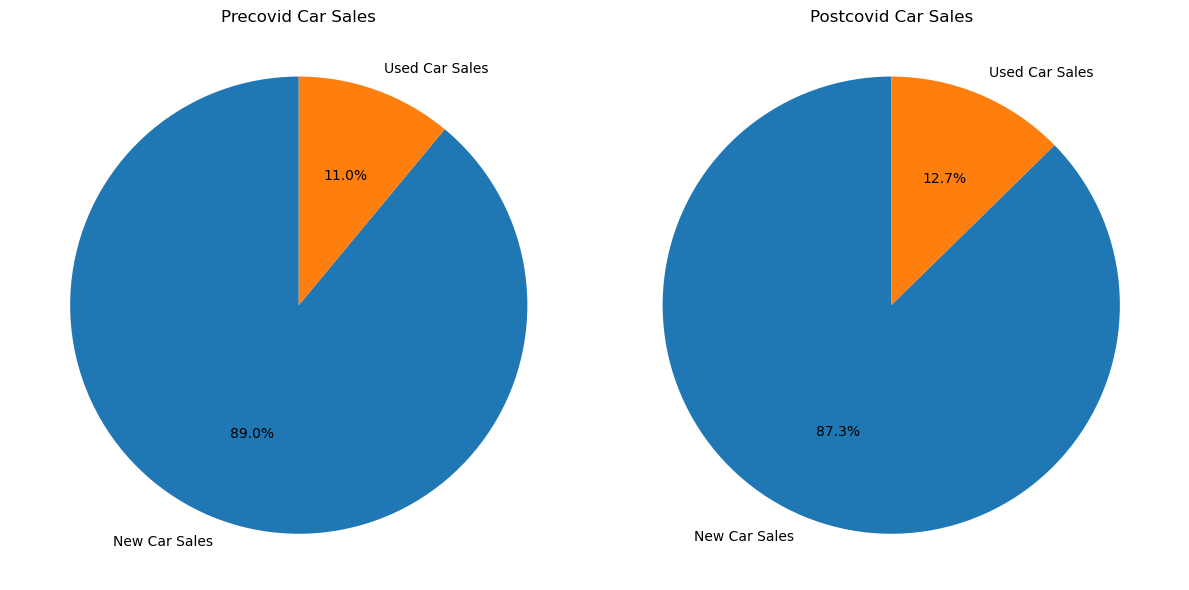

In [10]:
# Calculate the total sales for new and used cars for precovid period
total_new_precovid = df_precovid["Car Retail Sales (New)"].sum()
total_used_precovid = df_precovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_precovid = "New Car Sales", "Used Car Sales"
sizes_precovid = [total_new_precovid, total_used_precovid]

# Pie chart for precovid sales
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(sizes_precovid, labels=labels_precovid, autopct='%1.1f%%', startangle=90)
axs[0].axis("equal")
axs[0].set_title("Precovid Car Sales")

# Calculate the total sales for new and used cars for postcovid period
total_new_postcovid = df_postcovid["Car Retail Sales (New)"].sum()
total_used_postcovid = df_postcovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_postcovid = 'New Car Sales', 'Used Car Sales'
sizes_postcovid = [total_new_postcovid, total_used_postcovid]

# Pie chart for postcovid sales
axs[1].pie(sizes_postcovid, labels=labels_postcovid, autopct='%1.1f%%', startangle=90)
axs[1].axis("equal") 
axs[1].set_title("Postcovid Car Sales")

plt.tight_layout()
plt.show()

Precovid Period (2008-2019):

New Car Sales: Showed a consistent trend over the years with a predominant market share compared to used cars.
Used Car Sales: Also exhibited steady sales but consistently lower than new car sales.
The pie chart illustrated that the majority of car sales during this period were attributed to new cars.
Postcovid Period (2020-Onwards):

New Car Sales: Saw fluctuations, possibly due to the impact of the pandemic on the automotive market, resulting in varying sales volumes.
Used Car Sales: Displayed a fluctuating pattern as well, potentially influenced by market shifts and changing consumer preferences during and after the pandemic.
The pie chart might indicate shifts in consumer behavior or market dynamics.
The scatter plot and regression line suggest a moderate positive linear relationship between rate and sales. A low p-value suggests that the relationship is statistically significant. A correlation coefficient of 0.3256 indicates a moderately positive linear relationship between the two variables.

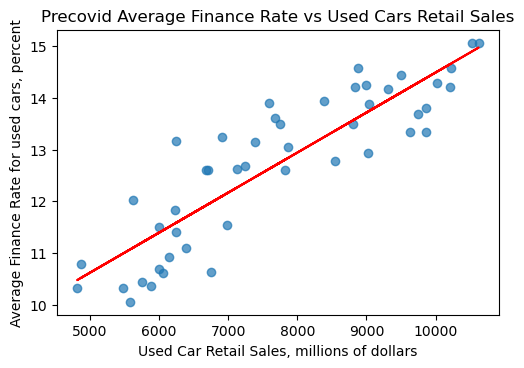

P-value: 0.0000
Correlation: 0.8796


In [12]:

y = df_precovid["Average Finance Rate (Used)"]
x = df_precovid["Car Retail Sales (Used)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Used Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for used cars, percent")
plt.title("Precovid Average Finance Rate vs Used Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_precovid["Average Finance Rate (Used)"].corr(df_precovid["Car Retail Sales (Used)"])
print(f"Correlation: {correlation:.4f}")

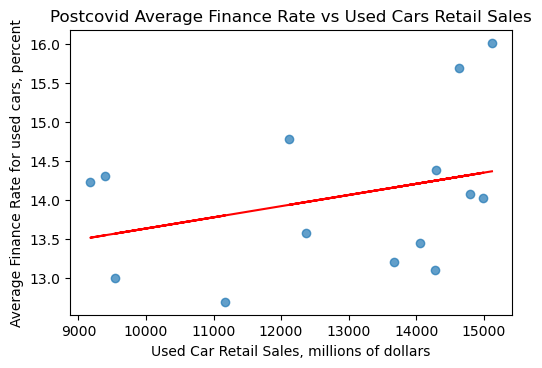

P-value: 0.2616
Correlation: 0.3220


In [13]:
y = df_postcovid["Average Finance Rate (Used)"]
x = df_postcovid["Car Retail Sales (Used)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Used Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for used cars, percent")
plt.title("Postcovid Average Finance Rate vs Used Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_postcovid["Average Finance Rate (Used)"].corr(df_postcovid["Car Retail Sales (Used)"])
print(f"Correlation: {correlation:.4f}")

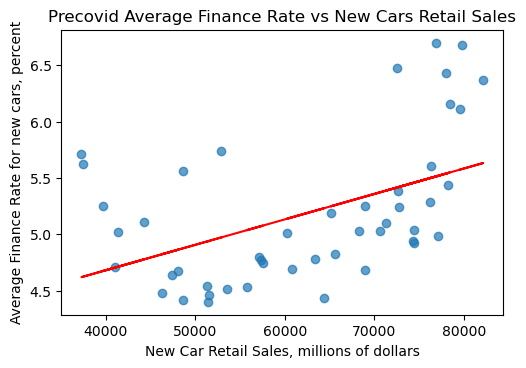

P-value: 0.0007
Correlation: 0.4760


In [14]:
y = df_precovid["Average Finance Rate (New)"]
x = df_precovid["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Precovid Average Finance Rate vs New Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_precovid["Average Finance Rate (New)"].corr(df_precovid["Car Retail Sales (New)"])
print(f"Correlation: {correlation:.4f}")

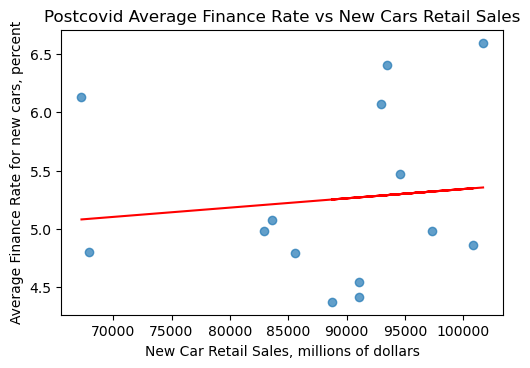

P-value: 0.7046
Correlation: 0.1114


In [15]:
y = df_postcovid["Average Finance Rate (New)"]
x = df_postcovid["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(5.7, 3.7))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Postcovid Average Finance Rate vs New Cars Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = df_postcovid["Average Finance Rate (New)"].corr(df_postcovid["Car Retail Sales (New)"])
print(f"Correlation: {correlation:.4f}")

Conclusion:

Precovid Period: There was a statistically significant moderate positive correlation between finance rates and new car sales.
Postcovid Period: The correlation between finance rates and new car sales weakened significantly and is likely not statistically significant.
This comparison suggests that the relationship between finance rates and new car sales might have altered or weakened after the onset of the covid pandemic.


Consumer Price Index for All Urban Consumers New Cars and Used Cars in U.S. City Average
The CPI is a measure of the average change in prices paid by urban consumers for a basket of consumer goods and services. It is published monthly by the Bureau of Labor Statistics (BLS). The CPI is used to track inflation, which is the rate at which prices for goods and services are rising.

The CPI for all urban consumers of new cars, used cars, and trucks in the average US city is a specific index that tracks the prices of these vehicles. The index is based on a sample of prices collected from new and used car dealerships in major cities across the United States.

In [17]:
# Load new vehicle data set into pandas
CPI_data = pd.read_csv("Resources/Consumer Price Index .csv")
CPI_data

,Date,CPI_new_cars,CPI_used_cars
0,2008-04-01,134.726,137.659
1,2008-05-01,134.646,136.393
2,2008-06-01,134.660,135.020
3,2008-07-01,134.821,133.709
4,2008-08-01,134.162,132.535
...,...,...,...
181,2023-05-01,178.616,199.646
182,2023-06-01,178.556,198.746
183,2023-07-01,178.411,196.086
184,2023-08-01,178.895,193.671


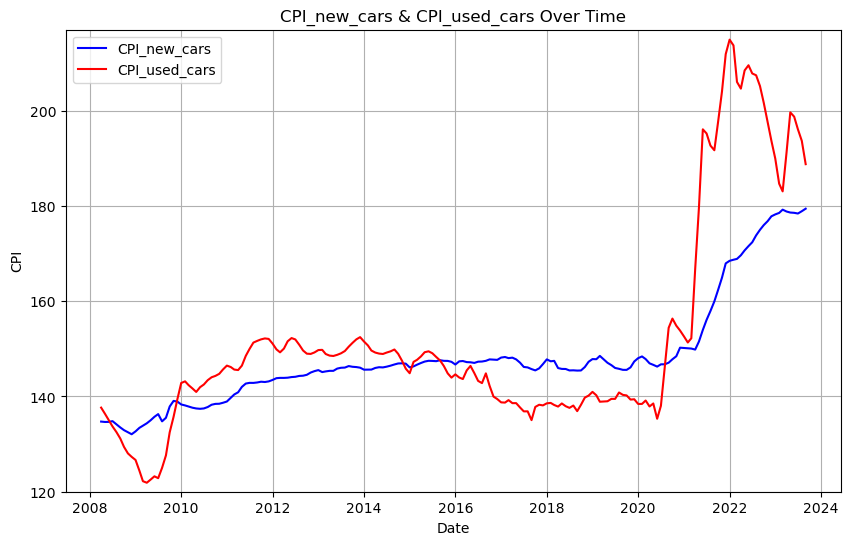

In [18]:
# Plot the data
# Convert the Date column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

plt.figure(figsize=(10, 6))
CPI_new_cars, = plt.plot(CPI_data['Date'], CPI_data['CPI_new_cars'], color = "blue", linestyle='-', label="CPI_new_cars")
CPI_used_cars, = plt.plot(CPI_data['Date'], CPI_data['CPI_used_cars'], color = "red", linestyle='-',label="CPI_used_cars" )
plt.title('CPI_new_cars & CPI_used_cars Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(handles=[CPI_new_cars,CPI_used_cars], loc="best")

plt.ylim(120,217)
plt.grid()
plt.show()

Consumer price index during covid 19 pandemic to present for all urban consumers of new cars and used cars in the average US cities

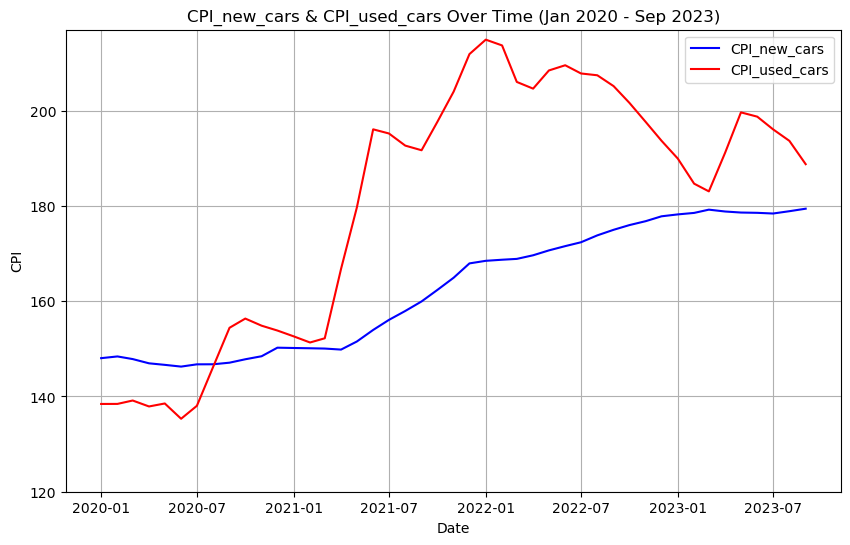

In [19]:
# Convert the 'Date' column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

# Filter the DataFrame for the desired time range
CPI_data_filtered = CPI_data[(CPI_data['Date'] >= '2020-01-01') & (CPI_data['Date'] <= '2023-09-01')]

# Plotting
plt.figure(figsize=(10, 6))
CPI_new_cars, = plt.plot(CPI_data_filtered['Date'], CPI_data_filtered['CPI_new_cars'], color="blue", linestyle='-', label="CPI_new_cars")
CPI_used_cars_and_trucks, = plt.plot(CPI_data_filtered['Date'], CPI_data_filtered['CPI_used_cars'], color="red", linestyle='-', label="CPI_used_cars")
plt.title('CPI_new_cars & CPI_used_cars Over Time (Jan 2020 - Sep 2023)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(handles=[CPI_new_cars, CPI_used_cars], loc="best")
plt.ylim(120, 217)
plt.grid()
plt.show()

In [20]:
# Print data frame filtered
CPI_data_filtered

,Date,CPI_new_cars,CPI_used_cars
141,2020-01-01,148.042,138.428
142,2020-02-01,148.403,138.437
143,2020-03-01,147.850,139.150
144,2020-04-01,146.959,137.901
145,2020-05-01,146.637,138.528
146,2020-06-01,146.271,135.320
147,2020-07-01,146.746,138.039
148,2020-08-01,146.759,146.245
149,2020-09-01,147.093,154.420
150,2020-10-01,147.810,156.354


Summary Statistics (2020-2023)

In [21]:
#Filter Date for the year 2020, 2021, 2022 and 2023

# Convert the 'Date' column to datetime format
CPI_data['Date'] = pd.to_datetime(CPI_data['Date'])

# Extract year from the 'Date' column
CPI_data['Year'] = CPI_data['Date'].dt.year

# Filter the DataFrame for the desired years
years_to_analyze = [2020, 2021, 2022, 2023]
CPI_data_filtered = CPI_data[CPI_data['Year'].isin(years_to_analyze)]

CPI_new_cars

In [22]:
#CPI_new_cars
# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary1 = CPI_data_filtered.groupby('Year')['CPI_new_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary1

,mean,median,variance,std_dev,sem
Year,,,,,
2020,147.604750,147.4515,1.221712,1.105311,0.319076
2021,156.243667,155.0225,40.668278,6.377168,1.840930
2022,172.479750,171.9710,11.179888,3.343634,0.965224
2023,178.746778,178.6160,0.149364,0.386477,0.128826


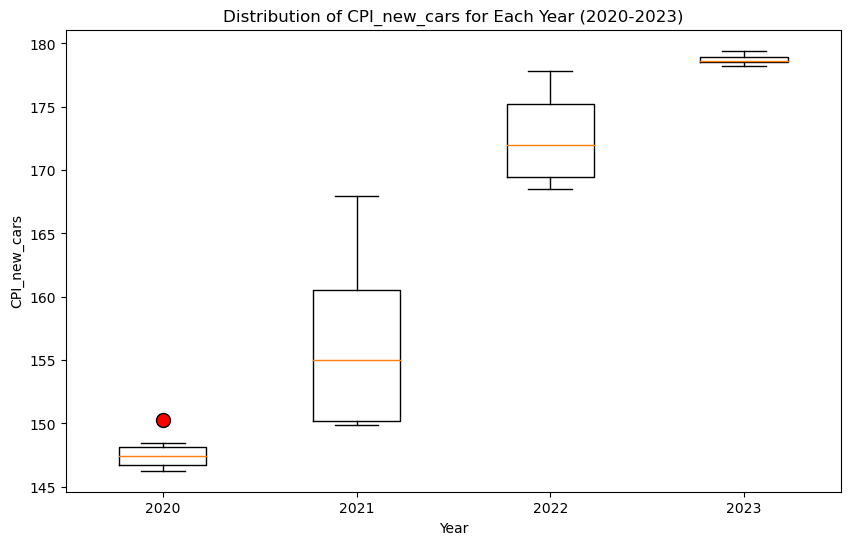

In [23]:
# Boxplot CPI_new_cars

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot and set the color and marker size of the dots
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)  # Set the marker style and size

plt.boxplot(
    [CPI_data_filtered[CPI_data_filtered['Year'] == year]['CPI_new_cars'] for year in years_to_analyze],
    labels=years_to_analyze, flierprops=flierprops
)

plt.xlabel('Year')
plt.ylabel('CPI_new_cars')
plt.title('Distribution of CPI_new_cars for Each Year (2020-2023)')

plt.show()

The CPI for new cars has increased steadily from 2020 to 2023. The distribution of CPI values has become more skewed to the right over time, with more values in the top quartile. There is significant variability in CPI values within each year, as evidenced by whisker length. There are some outliers each year, with CPI values that are much higher or lower than the median. One possible explanation for the increase in the average CPI over time is inflation due to the pandemic. The growing skewness of the distribution to the right could be due to a number of factors, such as growing income inequality.

CPI_used_cars

In [24]:
# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary2 = CPI_data_filtered.groupby('Year')['CPI_used_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary2

,mean,median,variance,std_dev,sem
Year,,,,,
2020,144.293667,138.8390,67.594598,8.221593,2.373370
2021,182.653583,192.1815,465.951583,21.585912,6.231316
2022,205.887250,206.7360,36.870239,6.072087,1.752860
2023,191.755444,191.1990,33.969444,5.828331,1.942777


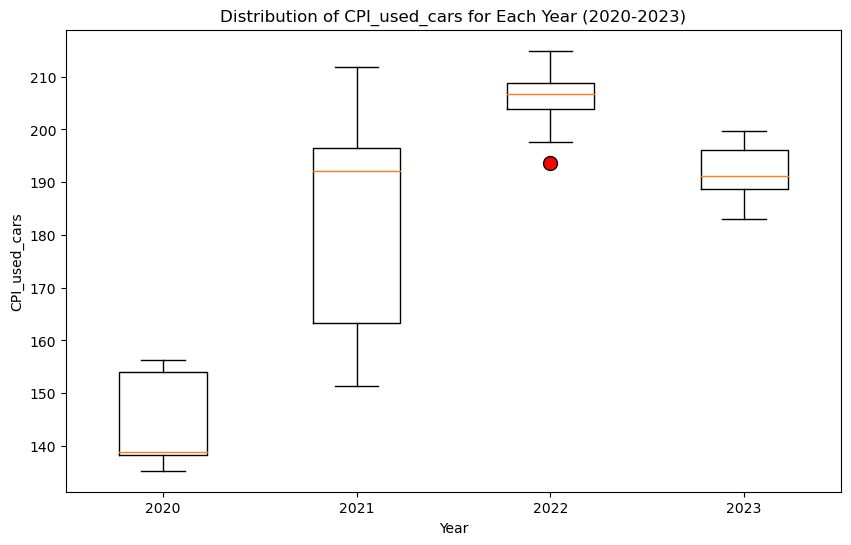

In [25]:
# Boxplot CPI_used_cars

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot and set the color and marker size of the dots
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)  # Set the marker style and size

plt.boxplot(
    [CPI_data_filtered[CPI_data_filtered['Year'] == year]['CPI_used_cars'] for year in years_to_analyze],
    labels=years_to_analyze, flierprops=flierprops
)

plt.xlabel('Year')
plt.ylabel('CPI_used_cars')
plt.title('Distribution of CPI_used_cars for Each Year (2020-2023)')

plt.show()

The CPI for used cars and trucks has increased steadily from 162 in 2020 to 190 in 2023. The interquartile range (IQR), which is the difference between the third and first quartiles, has also increased slightly over time. This suggests that the spread of the data has become somewhat greater, meaning there is more variability in the prices of used cars and trucks. There is a slight overlap between the 2022 and 2023 charts, suggesting there is some overlap in used car and truck prices between these two years. Overall, the boxplot suggests that prices for used cars and trucks in the United States have increased steadily over the past four years.

Prediccion 2024

In [26]:
# CPI_new_cars Summary Statistics 2008-2023

# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary_media = CPI_data.groupby('Year')['CPI_new_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary_media

,mean,median,variance,std_dev,sem
Year,,,,,
2008,133.778000,134.1620,1.129266,1.062670,0.354223
2009,135.626000,135.2555,4.345537,2.084595,0.601771
2010,137.997167,137.9980,0.194335,0.440835,0.127258
2011,141.884833,142.7770,2.236771,1.495584,0.431738
2012,144.233917,144.1015,0.273737,0.523199,0.151034
2013,145.786833,145.9390,0.183843,0.428770,0.123775
2014,146.277417,146.1975,0.261242,0.511119,0.147547
2015,147.136167,147.3685,0.252705,0.502697,0.145116
2016,147.357000,147.3545,0.094187,0.306900,0.088594


In [27]:
# Take just the mean and put it in a data frame CPI_new_cars 

data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Mean': [133.778000, 135.626000, 137.997167, 141.884833, 144.233917, 145.786833, 146.277417, 147.136167, 147.357000, 146.978333, 146.289917, 146.836417, 147.604750, 156.243667, 172.479750, 178.746778]
}

# Create a DataFrame
df = pd.DataFrame(data)

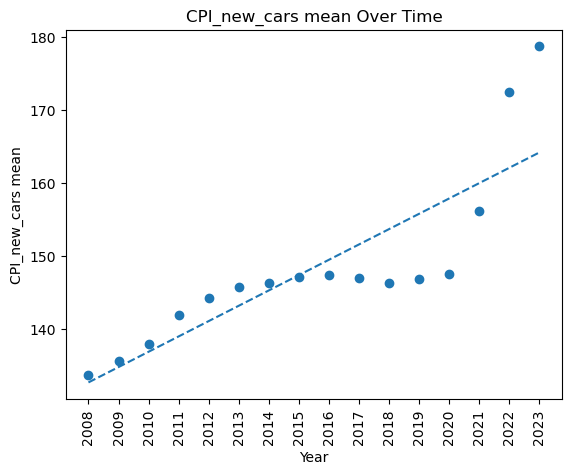

In [28]:
# Scatter plot CPI_new_cars mean 2008-2023

# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(df['Year'], df['Mean'])

# Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = pe_slope *df['Year']  + pe_int

# Scatter plot
plt.scatter(df['Year'], df['Mean'])
plt.plot(df['Year'], pe_fit, "--")
plt.xticks(df['Year'],rotation=90)

plt.title('CPI_new_cars mean Over Time')
plt.xlabel('Year')
plt.ylabel('CPI_new_cars mean')

plt.show()

In [29]:
# CPI_used_cars Summary Statistics 2008-2023

# Group by year and calculate mean, median, variance, standard deviation, and standard deviation error in CPI_new_cars
sumary_media2 = CPI_data.groupby('Year')['CPI_used_cars'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'  
)
sumary_media2

,mean,median,variance,std_dev,sem
Year,,,,,
2008,132.363333,132.5350,13.419649,3.663284,1.221095
2009,127.000500,124.7080,33.730311,5.807780,1.676562
2010,143.138250,143.0010,1.877104,1.370075,0.395506
2011,149.004833,149.2445,7.831261,2.798439,0.807840
2012,150.318000,149.9730,1.428181,1.195065,0.344986
2013,149.917917,149.6400,1.813185,1.346546,0.388714
2014,149.154750,149.2165,2.081737,1.442823,0.416507
2015,147.261333,147.6240,3.470299,1.862874,0.537765
2016,143.468917,143.8190,4.422463,2.102965,0.607074


In [30]:
# Take just the mean and put it in a data frame CPI_used_cars

data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Mean': [132.363333, 127.000500, 143.138250, 149.004833, 150.318000, 149.917917, 149.154750, 147.261333, 143.468917, 137.880083, 138.382167, 139.764583, 144.293667, 182.653583, 205.887250, 191.755444],
}

# Create a DataFrame
df2 = pd.DataFrame(data)

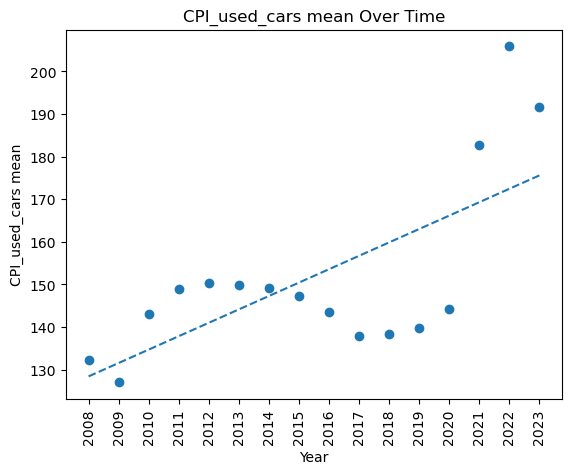

In [31]:
# Scatter plot CPI_used_cars mean 2008-2023

# Perform a linear regression on year versus petrol-electric cars
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(df2['Year'], df2['Mean'])

# Create equation of line to calculate predicted number of petrol-electric cars
p_fit = p_slope *df['Year']  + p_int

# Scatter plot
plt.scatter(df2['Year'], df2['Mean'])
plt.plot(df2['Year'], p_fit, "--")
plt.xticks(df2['Year'],rotation=90)

plt.title('CPI_used_cars mean Over Time')
plt.xlabel('Year')
plt.ylabel('CPI_used_cars mean')

plt.show()

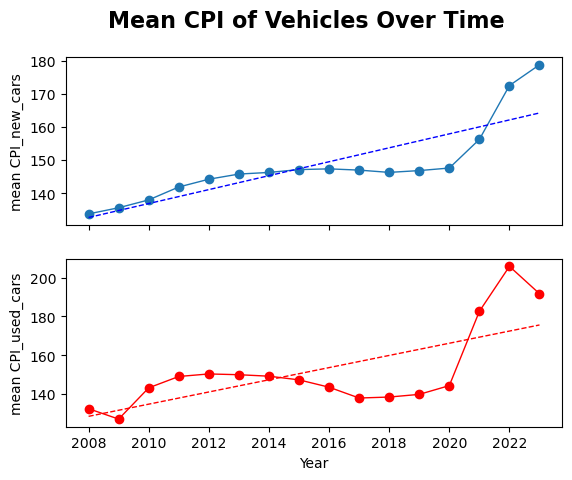

In [32]:
# Mean CPI New cars vs Used cars
# Generate a facet plot of all 2 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Mean CPI of Vehicles Over Time", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(Date), max(Date))
ax1.plot(df['Year'], df['Mean'] , linewidth=1, marker="o")
ax1.plot(df['Year'], pe_fit, "b--", linewidth=1)
ax1.set_ylabel("mean CPI_new_cars")

ax2.plot(df2['Year'], df2['Mean'], linewidth=1, marker="o", color="r")
ax2.plot(df2['Year'], p_fit, "r--", linewidth=1)
ax2.set_ylabel("mean CPI_used_cars")
ax2.set_xlabel("Year")

plt.show()

In [33]:
# Calculate the CPI for 2024
year = 2024
print(f"The mean CPI_new_cars in 2024 will be {round(pe_slope *year  + pe_int,0)}.")
print(f"The mean CPI_used_cars in 2024 will be {round(p_slope *year + p_int,0)}.")

The mean CPI_new_cars in 2024 will be 166.0.
The mean CPI_used_cars in 2024 will be 179.0.


Analysis

Before the pandemic:

The mean CPI for both new and used cars increased steadily from 2008 to 2020. The mean CPI for new cars was consistently higher than the mean CPI for used cars. The largest year-over-year increase in the mean CPI for both new and used cars occurred in 2012.

After the pandemic:

The mean CPI for both new and used cars continued to increase, but at a faster rate than before the pandemic. The gap between the mean CPI for new and used cars widened. The mean CPI for new cars is expected to reach 166.0 in 2024, while the mean CPI for used cars is expected to reach 179.0.

Conclusions

The pandemic has had a significant impact on the CPI for both new and used cars. The CPI for both types of cars has risen at a faster rate since the pandemic began and the gap between the two has widened.

The CPI for used cars is now higher than the CPI for new cars. This is likely due to a number of factors, including supply chain disruptions, increased demand for used cars, and rising raw materials costs.

The CPI for new and used cars is expected to continue rising in 2024. This is likely due to a number of factors, including inflation and rising interest rates

In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import linregress
from sklearn import datasets

In [2]:
temp_df=pd.read_csv("Resources/car_df.csv")
car_df_before=temp_df[(temp_df['observation_date'] < '2019-12-31') & (temp_df['observation_date'] > "2013-12-31")]
car_df_after=temp_df[(temp_df['observation_date'] > "2013-12-31")]

In [3]:
date=pd.to_datetime(car_df_before['observation_date'])
cars_sold=car_df_before['Number of Cars Sold']
car_df_before["Days"]=date-date.min()
days = car_df_before['Days'].dt.days
temp_df["Days"]=car_df_before['observation_date']

C:\Users\iec08\AppData\Local\Temp\ipykernel_20056\2957751833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_before["Days"]=date-date.min()


Text(0, 0.5, '# of Cars Sold (Millions)')

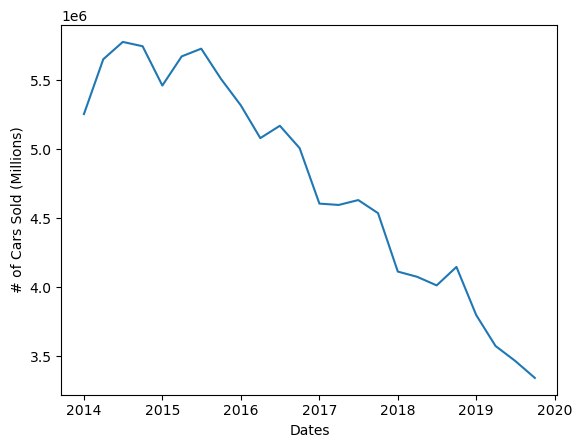

In [4]:
plt.plot(date, cars_sold)
plt.xlabel('Dates')
plt.ylabel('# of Cars Sold (Millions)')

Text(0, 0.5, '# of Cars Sold (Millions)')

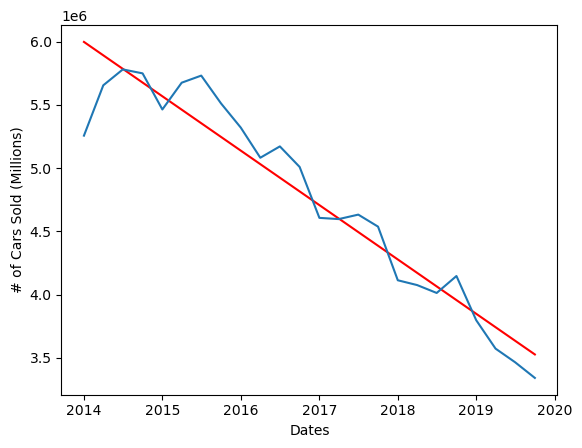

In [5]:
(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(days, cars_sold)
regress_values=days*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(date,regress_values,"r-")
plt.plot(date, cars_sold)

plt.xlabel('Dates')
plt.ylabel('# of Cars Sold (Millions)')

Text(0, 0.5, '# of Cars Sold (Millions)')

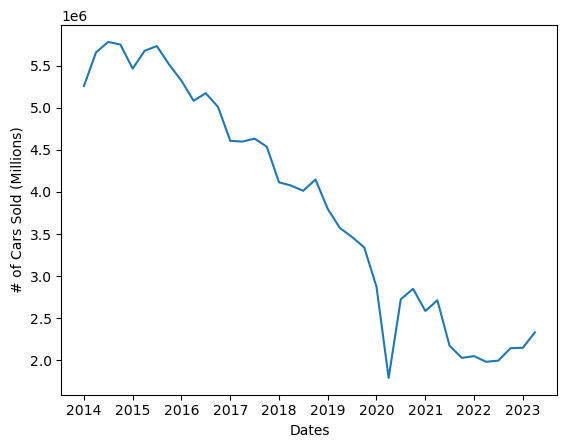

In [6]:
date=pd.to_datetime(car_df_after['observation_date'])
cars_sold=car_df_after['Number of Cars Sold']
plt.plot(date, cars_sold)
plt.xlabel('Dates')
plt.ylabel('# of Cars Sold (Millions)')

Total Sales and Amount Financed over Time

In [7]:
cd '/Users/jnellniz/Desktop/Module 7 Group Project/Repository/New_Car_Loan_Analysis/Resources'

/Users/jnellniz/Desktop/Module 7 Group Project/Repository/New_Car_Loan_Analysis/Resources


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter


,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00000,6758.666667,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00000,6058.000000,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00000,4815.000000,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33333,5883.000000,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.66667,5582.666667,135.028,742.02088


In [13]:
temp_df = pd.read_csv('car_df.csv')
temp_df.head()

,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00000,6758.666667,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00000,6058.000000,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00000,4815.000000,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33333,5883.000000,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.66667,5582.666667,135.028,742.02088


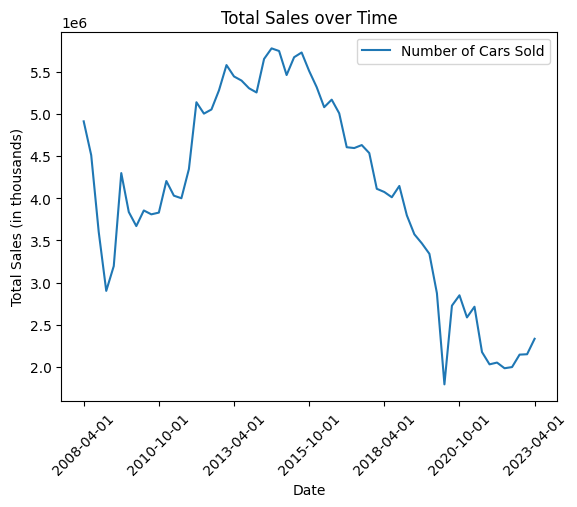

In [9]:
##Total Sales over Time

# Create a line chart
temp_df.plot(x='observation_date', y='Number of Cars Sold', kind='line')

plt.xlabel('Date')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales over Time')

# Rotate labels
plt.xticks(rotation=45)

# Show
plt.show()

([<matplotlib.axis.XTick at 0x1646ba8d0>,
 [Text(13970.0, 0, '2008'),
  Text(14883.0, 0, '2010'),
  Text(15796.0, 0, '2013'),
  Text(16709.0, 0, '2015'),
  Text(17622.0, 0, '2018'),
  Text(18536.0, 0, '2020'),
  Text(19448.0, 0, '2023')])

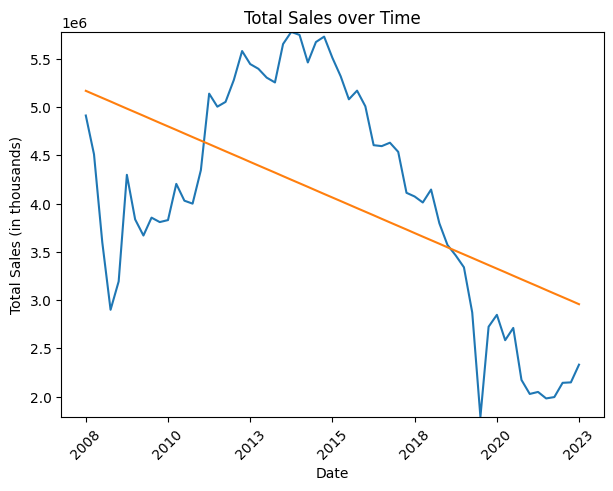

In [12]:
# Convert to datetime type
temp_df['observation_date'] = pd.to_datetime(temp_df['observation_date'])

# Set figure size
plt.figure(figsize=(7, 5))

# Create a line chart
plt.plot(temp_df['observation_date'], temp_df['Number of Cars Sold'])

# Calculate the linear regression line for 2008-2018
x = np.arange(len(temp_df['observation_date']))
y = temp_df['Number of Cars Sold']
coefficients = np.polyfit(x, y, 1)
linear_regression_line = np.polyval(coefficients, x)

# Plot the linear regression line
plt.plot(temp_df['observation_date'], linear_regression_line, label='Linear Regression')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales (in thousands)')
plt.title('Total Sales over Time')

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=True))

# Set limits
plt.ylim(ymin=temp_df['Number of Cars Sold'].min(), ymax=temp_df['Number of Cars Sold'].max())

# Rotate labels
plt.xticks(rotation=45)

# Define custom labels
custom_labels = ['2008', '2010', '2013', '2015', '2018', '2020', '2023']

# Set the custom labels
plt.xticks(temp_df['observation_date'][::10], custom_labels)

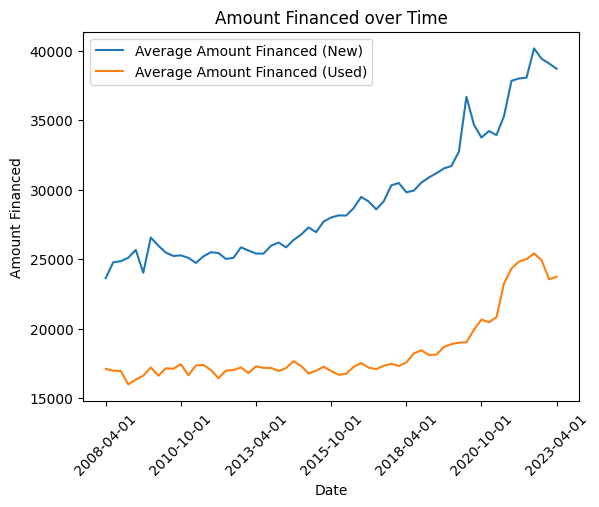

In [14]:
## Amount Financed over Time

# Create a line chart
temp_df.plot(x='observation_date', y=['Average Amount Financed (New)', 'Average Amount Financed (Used)'], kind='line')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount Financed')
plt.title('Amount Financed over Time')

# Rotate labels
plt.xticks(rotation=45)

# Show
plt.show()

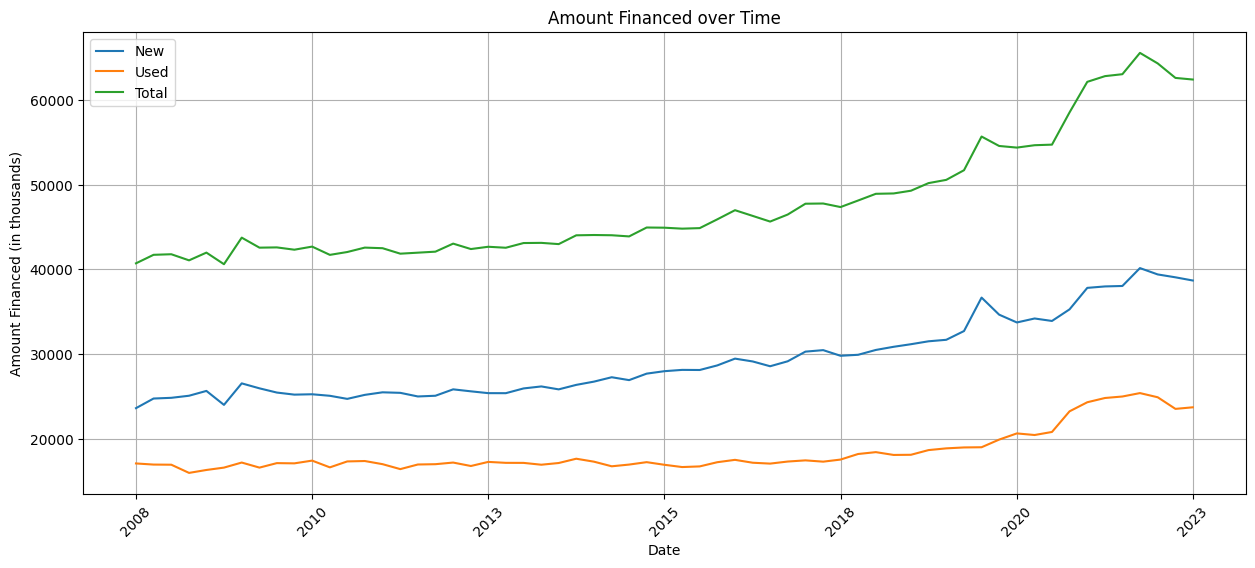

In [15]:
# Convert to datetime type
temp_df['observation_date'] = pd.to_datetime(temp_df['observation_date'])

# Set figure size
plt.figure(figsize=(15, 6))

# Create a line chart for new
plt.plot(temp_df['observation_date'], temp_df['Average Amount Financed (New)'], label='New')

# Create a line chart for used
plt.plot(temp_df['observation_date'], temp_df['Average Amount Financed (Used)'], label='Used')

# Calculate total amount
total_amount_financed = temp_df['Average Amount Financed (New)'] + temp_df['Average Amount Financed (Used)']

# Create a line chart for total amount
plt.plot(temp_df['observation_date'], total_amount_financed, label='Total')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount Financed (in thousands)')
plt.title('Amount Financed over Time')

# Rotate labels
plt.xticks(rotation=45)

# Define custom labels 
custom_labels = ['2008', '2010', '2013', '2015', '2018', '2020', '2023']

# Set the custom labels 
plt.xticks(temp_df['observation_date'][::10], custom_labels)

# Add gridlines to the plot
plt.grid(True)

# Show 
plt.legend()

plt.show()

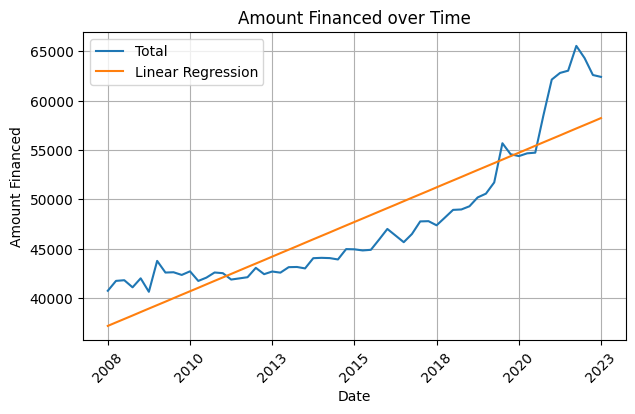

In [17]:
# Set the figure size
plt.figure(figsize=(7, 4))

# Calculate the total amount financed
total_amount_financed = temp_df['Average Amount Financed (New)'] + temp_df['Average Amount Financed (Used)']

# Create a line chart for the total amount
plt.plot(temp_df['observation_date'], total_amount_financed, label='Total')

# Calculate the linear regression line for the total amount financed
x = np.arange(len(temp_df['observation_date']))
y = total_amount_financed
coefficients = np.polyfit(x, y, 1)
linear_regression_line = np.polyval(coefficients, x)

# Plot the linear regression line for the total amount financed
plt.plot(temp_df['observation_date'], linear_regression_line, label='Linear Regression')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount Financed')
plt.title('Amount Financed over Time')

# Rotate the x-axis label
plt.xticks(rotation=45)

# Define custom labels for the x-axis
custom_labels = ['2008', '2010', '2013', '2015', '2018', '2020', '2023']

# Set the custom labels on the x-axis
plt.xticks(temp_df['observation_date'][::10], custom_labels)

# Show the legend
plt.legend()

# Add gridlines to the plot
plt.grid(True)

# Show the plot
plt.show()

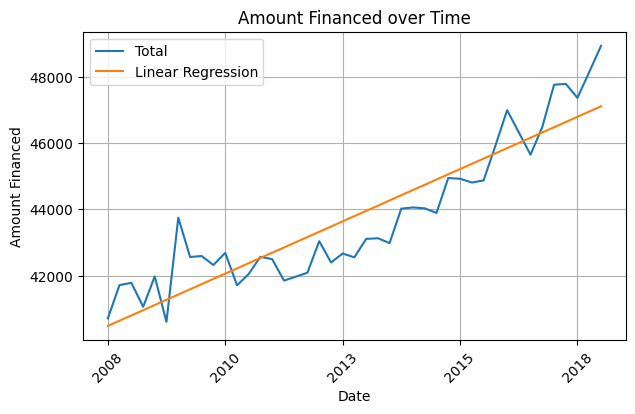

In [24]:
# Set the figure size
plt.figure(figsize=(7, 4))

# Filter by date
temp_df = car_df[car_df['observation_date']<'2019']

# Calculate the total amount financed
total_amount_financed = temp_df['Average Amount Financed (New)'] + temp_df['Average Amount Financed (Used)']

# Create a line chart for the total amount
plt.plot(temp_df['observation_date'], total_amount_financed, label='Total')

# Calculate the linear regression line for the total amount financed
x = np.arange(len(temp_df['observation_date']))
y = total_amount_financed
coefficients = np.polyfit(x, y, 1)
linear_regression_line = np.polyval(coefficients, x)

# Plot the linear regression line for the total amount financed
plt.plot(temp_df['observation_date'], linear_regression_line, label='Linear Regression')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Amount Financed')
plt.title('Amount Financed over Time')

# Rotate the x-axis label
plt.xticks(rotation=45)

# Define custom labels for the x-axis
custom_labels = ['2008', '2010', '2013', '2015', '2018']

# Set the custom labels on the x-axis
plt.xticks(temp_df['observation_date'][::10], custom_labels)

# Show the legend
plt.legend()

# Add gridlines to the plot
plt.grid(True)

# Show the plot
plt.show()